# Example notebook for lephad-blazars repository 

Xavier Rodrigues 2023

Written in Python 3.10

### Original publication:

Rodrigues, Paliya, Garrappa, Omeliukh, Franckowiak and Winter, *Leptohadronic Modeling of 324 Gamma-Ray Blazars* (2023)



In [1]:
import numpy as np
from matplotlib import pyplot as plt
import pandas as pd
import astropy.units as u
from astropy.constants import codata2010 as const


In [2]:
C_FSRQ = '#15b01a' # Green
C_BLLAC = '#7e1e9c' # Purple

mycolors = [
    [0.90196078, 0.62352941, 0.        ],
    [0.33725490, 0.70588235, 0.91372549],
    [0.,         0.61960784, 0.45098039],
    [0.94117647, 0.89411765, 0.25882353],
    [0.,         0.44705882, 0.69803922],
    [0.83529412, 0.36862745, 0.        ],
    [0.78823529, 0.47450980, 0.69019608],
    [0.98431372, 0.68627451, 0.89411765]
]


def set_font_size(s):
    plt.rcParams['xtick.labelsize'] = plt.rcParams['ytick.labelsize'] = s
    plt.rcParams['axes.labelsize'] = s
    plt.rcParams['legend.fontsize'] = s
    plt.rcParams['axes.titlesize'] = s
    plt.rcParams['font.size'] = s
    
    return

### Example 1: plotting entire sample using data in `model_parameters.csv`

In [3]:
table = pd.read_csv('model_parameters.csv')
table.head()

,Association,Fermi Name,CGRABS Name,Class,dec,RA,Redshift,Fermi-LAT Flux,Disk Luminosity,BLR Radius,...,Electron Luminosity Best Fit,Electron Max Lorentz Factor Best Fit,Electron Min Lorentz Factor Best Fit,Electron Spectral Index Best Fit,Proton Luminosity Best Fit,Proton Luminosity Min,Proton Luminosity Max,Proton Max Lorentz Factor Best Fit,Proton Min Lorentz Factor Fixed,Proton Spectral Index Fixed
0,PKS 0426-380,3FGL J2036.8-2830,CGRABS J0428-3756,LBL,-37.940300,67.172997,1.10,2.138448e-10,1.000000e+46,3.147391e+17,...,4.770000e+43,42600.0,134.0,1.46,9.260000e+47,9.260000e+46,9.950868e+47,1610000.0,100,1.0
1,PKS B0802-010,3FGL J2036.8-2830,CGRABS J0805-0111,FSRQ,-1.181000,121.300400,1.39,8.120996e-12,2.511886e+46,4.967941e+17,...,1.120000e+43,1000.0,10.3,3.00,1.300000e+46,7.310437e+45,1.501217e+46,140000.0,100,1.0
2,GB6 J0654+5042,3FGL J2036.8-2830,CGRABS J0654+5042,FSRQ,50.702702,103.596199,1.25,1.309847e-11,9.120108e+44,9.565601e+16,...,2.800000e+41,1260.0,568.0,1.89,1.210000e+44,5.892307e+42,1.300275e+44,1580000.0,100,1.0
3,S4 1849+67,3FGL J2036.8-2830,CGRABS J1849+6705,FSRQ,67.090897,282.319214,0.66,4.989788e-11,3.019952e+45,1.727979e+17,...,1.620000e+42,8410.0,20.8,2.04,2.970000e+44,1.794760e+44,3.191585e+44,2680000.0,100,1.0
4,AP Librae,3FGL J2036.8-2830,CGRABS J1517-2422,IBL,-24.372999,229.425400,0.05,6.441017e-11,1.513561e+43,1.234271e+16,...,1.110000e+43,63800.0,305.0,2.11,4.180000e+46,2.714415e+46,4.491861e+46,14000000.0,100,1.0


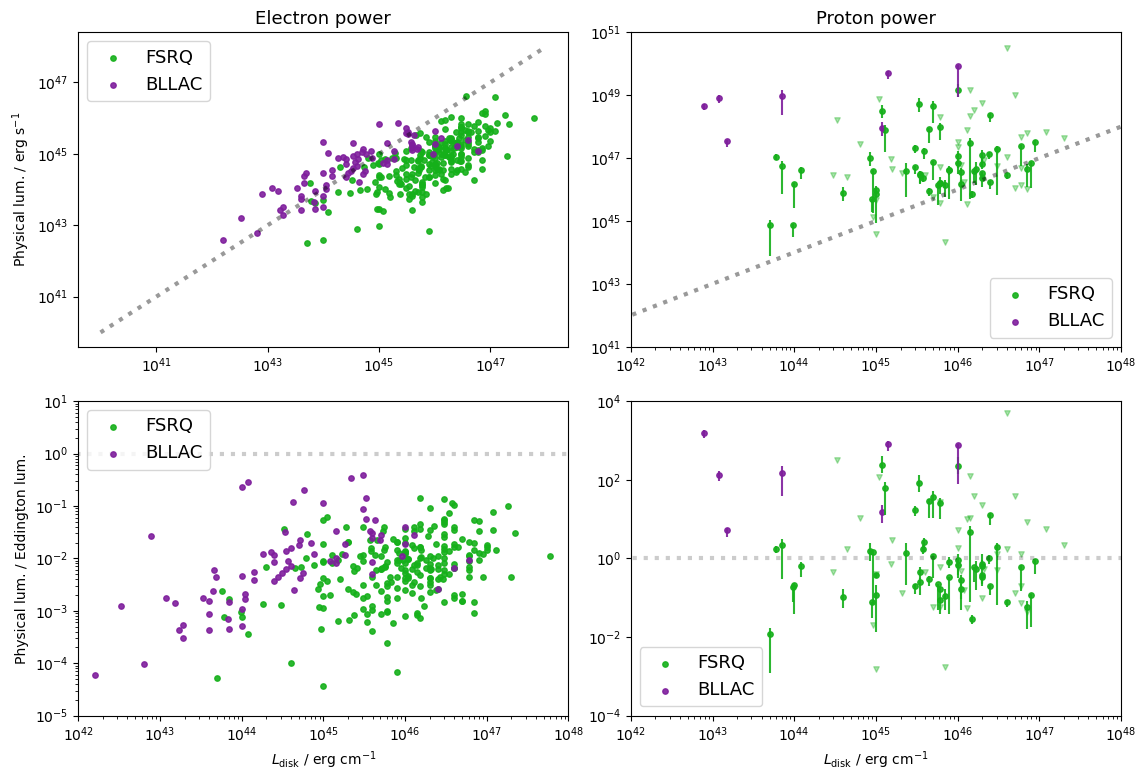

In [4]:
fig, ((ax0,ax1),(ax2,ax3)), = plt.subplots(2,2,figsize=(11.5,8))
set_font_size(13)
alpha=0.9
linealpha=0.7
size=15

# Physical luminosities:

elum = table['Electron Luminosity Best Fit'] * table['Bulk Lorentz Best Fit'] ** 2 / 2
plum = table['Proton Luminosity Best Fit'] * table['Bulk Lorentz Best Fit'] ** 2 / 2
plum_min = table['Proton Luminosity Min'] * table['Bulk Lorentz Best Fit'] ** 2 / 2
plum_max = table['Proton Luminosity Max'] * table['Bulk Lorentz Best Fit'] ** 2 / 2

plumerr_up = plum_max - plum
plumerr_lo = plum - plum_min

# Convert to faction of Eddington luminosity
eddington_lum = table['Black Hole Mass'] * 1.26e38 # erg/s

elum_eddunits = elum / eddington_lum
plum_eddunits = plum / eddington_lum
plum_max_eddunits = plum_max / eddington_lum
plum_min_eddunits = plum_min / eddington_lum
plumerr_up_eddunits = plum_max_eddunits - plum_eddunits
plumerr_lo_eddunits = plum_eddunits - plum_min_eddunits

# Consider upper limit if best fit has zero protons or 
# is compatible with zero protons within 1 sigma
consider_uplim = table['Proton Luminosity Min'] == 0

# Disk luminosity array for the x-axis
disklum = table['Disk Luminosity']

# Separete BL Lacs from FSRQs 
is_bllac = np.isin(table['Class'], ['HBL', 'LBL', 'IBL'])
is_fsrq = table['Class'] == 'FSRQ'

# Plot electron luminosities

ax0.scatter(disklum[is_fsrq],
            elum[is_fsrq], 
            alpha=alpha,
            color=C_FSRQ,
            label=r'FSRQ',
            s=size)
ax0.scatter(disklum[is_bllac],
            elum[is_bllac], 
            alpha=alpha,
            color=C_BLLAC,
            label=r'BLLAC',
            s=size)

# Plot proton luminosities

## Points that are not upper limits
ax1.scatter(disklum[is_fsrq * ~consider_uplim],
            plum[is_fsrq * ~consider_uplim],
            alpha=alpha,
            color=C_FSRQ,
            label=r'FSRQ',
            s=size)
ax1.scatter(disklum[is_bllac * ~consider_uplim],
            plum[is_bllac * ~consider_uplim],
            alpha=alpha,
            color=C_BLLAC,
            label=r'BLLAC',
            s=size)

## Upper limits
ax1.scatter(disklum[is_fsrq * consider_uplim],
            plum[is_fsrq * consider_uplim],
            alpha=alpha*0.4,
            color=C_FSRQ,
            marker='v',
            s=size)
ax1.scatter(disklum[is_bllac * consider_uplim],
            plum[is_bllac * consider_uplim],
            alpha=alpha*0.4,
            color=C_BLLAC,
            marker='v',
            s=size)


ax1.errorbar(disklum[is_fsrq * ~consider_uplim],
             plum[is_fsrq * ~consider_uplim], 
            (plumerr_lo[is_fsrq * ~consider_uplim],
             plumerr_up[is_fsrq * ~consider_uplim]),
             alpha=alpha,
             color=C_FSRQ, 
             ls='none')
ax1.errorbar(disklum[is_bllac * ~consider_uplim],
             plum[is_bllac * ~consider_uplim], 
            (plumerr_lo[is_bllac * ~consider_uplim],
             plumerr_up[is_bllac * ~consider_uplim]),
             alpha=alpha,
             color=C_BLLAC, 
             ls='none')

# Plot electron luminosities in Eddington units

ax2.scatter(disklum[is_fsrq],
            elum_eddunits[is_fsrq],
            alpha=alpha,
            color=C_FSRQ,
            label=r'FSRQ',
            s=size)
ax2.scatter(disklum[is_bllac],
            elum_eddunits[is_bllac],
            alpha=alpha,
            color=C_BLLAC,
            label=r'BLLAC',
            s=size)

# Plot proton luminosities in Eddington units

## Points that are not upper limits
ax3.scatter(disklum[is_fsrq * ~consider_uplim],
            plum_eddunits[is_fsrq * ~consider_uplim],
            alpha=alpha,
            color=C_FSRQ,
            label=r'FSRQ',
            s=size)
ax3.scatter(disklum[is_bllac * ~consider_uplim],
            plum_eddunits[is_bllac * ~consider_uplim],
            alpha=alpha,
            color=C_BLLAC,
            label=r'BLLAC',
            s=size)
## Upper limirs
ax3.scatter(disklum[is_fsrq * consider_uplim],
            plum_eddunits[is_fsrq * consider_uplim],
            alpha=alpha*0.4,
            marker='v',
            color=C_FSRQ,
            s=size)
ax3.scatter(disklum[is_bllac * consider_uplim],
            plum_eddunits[is_bllac * consider_uplim],
            alpha=alpha*0.4,
            marker='v',
            color=C_BLLAC,
            s=size)



ax3.errorbar(disklum[is_fsrq * ~consider_uplim],
             plum_eddunits[is_fsrq * ~consider_uplim], 
            (plumerr_lo_eddunits[is_fsrq * ~consider_uplim],
             plumerr_up_eddunits[is_fsrq * ~consider_uplim]),
            alpha=alpha,
            ls='none',
            color=C_FSRQ)
ax3.errorbar(disklum[is_bllac * ~consider_uplim],
             plum_eddunits[is_bllac * ~consider_uplim], 
            (plumerr_lo_eddunits[is_bllac * ~consider_uplim],
             plumerr_up_eddunits[is_bllac * ~consider_uplim]),
            alpha=alpha,
            ls='none',
            color=C_BLLAC)

[ax.loglog() for ax in fig.get_axes()]

[ax.plot([1e40,1e48],[1e40,1e48],
         ls=':',c='k',
         lw=3,alpha=0.4) for ax in (ax0,ax1)]

[ax.plot([1e40,1e48],[1e0,1e0],
         ls=':',c='k',
         lw=3,alpha=0.2) for ax in (ax2,ax3)]

ax2.set_xlabel(r"$L_\mathrm{disk}$ / erg cm$^{-1}$")
ax3.set_xlabel(r"$L_\mathrm{disk}$ / erg cm$^{-1}$")
ax0.set_ylabel(r"Physical lum. / erg s$^{-1}$")
ax2.set_ylabel(r"Physical lum. / Eddington lum.")

ax0.set_title("Electron power")
ax1.set_title("Proton power")

ax0.legend(loc='upper left')
ax1.legend(loc='lower right')
ax2.legend(loc='upper left')
ax3.legend(loc='lower left')

plt.tight_layout()
ax1.axis([1e42,1e48,1e41,1e51])
ax2.axis([1e42,1e48,1e41,1e51])
ax2.axis([1e42,1e48,1e-5,1e1])
ax3.axis([1e42,1e48,1e-4,1e4])

plt.show()

### Example 2: Plotting results for an individual source

In [5]:
# Load SED information
sed = pd.read_csv('model_results/3C_371/3C_371_photons.csv')
sed.head()

,Energy,Total Flux,Synchrotron Primary Electrons,Compton Primary Electrons,Synchrotron Bethe Heitler Pairs,Compton Bethe Heitler Pairs,Synchrotron Photon Annihilation Pairs,Compton Photon Annihilation Pairs,Synchrotron Photopion Pairs,Compton Photopion Pairs,...,Min Compton Primary Electrons,Min Synchrotron Bethe Heitler Pairs,Min Compton Bethe Heitler Pairs,Min Synchrotron Photon Annihilation Pairs,Min Compton Photon Annihilation Pairs,Min Synchrotron Photopion Pairs,Min Compton Photopion Pairs,Min Synchrotron Primary Protons,Min Compton Primary Protons,Min Neutral Pion Decay
0,0.000008,4.111061e-24,0.000000e+00,0.0,0.000000e+00,0.0,0.000000e+00,0.0,0.000000e+00,0.0,...,0.0,0.000000e+00,0.0,0.000000e+00,0.0,0.000000e+00,0.0,0.000000e+00,0.0,0.000000e+00
1,0.000009,6.491191e-15,6.506735e-15,0.0,6.808161e-22,0.0,1.685750e-22,0.0,4.554122e-26,0.0,...,0.0,4.598723e-22,0.0,1.479174e-22,0.0,2.812298e-26,0.0,1.203832e-18,0.0,2.913090e-52
2,0.000010,7.500774e-15,7.519280e-15,0.0,7.827091e-22,0.0,1.839308e-22,0.0,5.242587e-26,0.0,...,0.0,5.288143e-22,0.0,1.610342e-22,0.0,3.237439e-26,0.0,1.346490e-18,0.0,3.591474e-52
3,0.000011,8.648351e-15,8.670238e-15,0.0,8.986171e-22,0.0,2.004274e-22,0.0,6.028356e-26,0.0,...,0.0,6.072553e-22,0.0,1.750877e-22,0.0,3.722662e-26,0.0,1.503024e-18,0.0,4.421704e-52
4,0.000013,9.952287e-15,9.978028e-15,0.0,1.030469e-21,0.0,2.181546e-22,0.0,6.925244e-26,0.0,...,0.0,6.965058e-22,0.0,1.901499e-22,0.0,4.276495e-26,0.0,1.674840e-18,0.0,5.437399e-52


In [6]:
# Load neutrino information 
nu = pd.read_csv('model_results/3C_371/3C_371_neutrinos.csv')
nu.head()

,Energy,Neutrino Flux Best Fit,Neutrino Flux Min,Neutrino Flux Max
0,8.742857e+09,3.204081e-21,2.239982e-21,4.238891e-21
1,9.662351e+09,3.913203e-21,2.735720e-21,5.177052e-21
2,1.067855e+10,4.779220e-21,3.341137e-21,6.322792e-21
3,1.180162e+10,5.836829e-21,4.080487e-21,7.722016e-21
4,1.304281e+10,7.128389e-21,4.983378e-21,9.430773e-21


In [7]:
# Load multi-wavelength data 
data = pd.read_csv('model_results/3C_371/3C_371_mw_data.csv')
data.head()

,Energy,Flux Value,Flux Error,Is Upper Limit
0,3.060394e-07,4.514000e-15,4.810000e-16,0.0
1,6.244858e-07,1.413400e-14,0.000000e+00,0.0
2,7.361488e-07,6.942000e-15,7.120000e-16,0.0
3,1.588096e-06,8.939500e-15,0.000000e+00,0.0
4,1.687352e-06,2.227700e-14,9.792000e-16,0.0


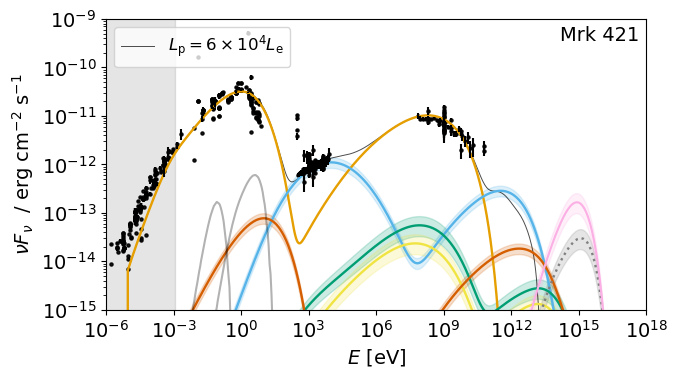

In [8]:
# Extract best-fit baryonic loading for the plot caption
source_parameters = table.loc[table['Association'] == '3C 371']
barload = np.array(
    source_parameters['Proton Luminosity Best Fit'] / 
    source_parameters['Electron Luminosity Best Fit']
    )[0]
expo = np.floor(np.log10(barload))
base = barload * 10 ** - expo
label = rf"$L_\mathrm{{p}}={base:.0f}\times10^{{" + f"{expo:.0f}" + "}L_\mathrm{{e}}$"

_ = plt.figure(figsize=(7,4))
set_font_size(14)


egrid = sed['Energy'] # Energy grid in eV (all units are described in README.md)

# Plot total SED
plt.loglog(egrid, sed['Total Flux'] , lw=0.7, c='k',alpha=0.7,label=label)

# Plot components
plt.loglog(egrid, (sed['Synchrotron Primary Electrons'] + 
                   sed['Compton Primary Electrons']), 
                   c=mycolors[0],lw=1.7)
plt.loglog(egrid, (sed['Synchrotron Bethe Heitler Pairs'] + 
                   sed['Compton Bethe Heitler Pairs']), 
                   c=mycolors[1],lw=1.7)
plt.loglog(egrid, (sed['Synchrotron Photon Annihilation Pairs'] + 
                   sed['Compton Photon Annihilation Pairs']), 
                   c=mycolors[2],lw=1.7)
plt.loglog(egrid, (sed['Synchrotron Photopion Pairs'] + 
                   sed['Compton Photopion Pairs']), 
                   c=mycolors[3],lw=1.7)
plt.loglog(egrid, (sed['Synchrotron Primary Protons'] + 
                   sed['Compton Primary Protons']), 
                   c=mycolors[5],lw=1.7)
plt.loglog(egrid, sed['Neutral Pion Decay'], 
                   c='gray',ls=':',lw=1.7)

# Plot uncertainty bands
plt.fill_between(egrid, (sed['Min Synchrotron Bethe Heitler Pairs'] + 
                         sed['Min Compton Bethe Heitler Pairs']),
                        (sed['Max Synchrotron Bethe Heitler Pairs'] + 
                         sed['Max Compton Bethe Heitler Pairs']),
                         color=mycolors[1],alpha=0.2)
plt.fill_between(egrid, (sed['Min Synchrotron Photon Annihilation Pairs'] + 
                         sed['Min Compton Photon Annihilation Pairs']),
                        (sed['Max Synchrotron Photon Annihilation Pairs'] + 
                         sed['Max Compton Photon Annihilation Pairs']),
                         color=mycolors[2],alpha=0.2)
plt.fill_between(egrid, (sed['Min Synchrotron Photopion Pairs'] + 
                         sed['Min Compton Photopion Pairs']),
                        (sed['Max Synchrotron Photopion Pairs'] + 
                         sed['Max Compton Photopion Pairs']),
                         color=mycolors[3],alpha=0.2)
plt.fill_between(egrid, (sed['Min Synchrotron Primary Protons'] + 
                         sed['Min Compton Primary Protons']),
                        (sed['Max Synchrotron Primary Protons'] + 
                         sed['Max Compton Primary Protons']),
                         color=mycolors[5],alpha=0.2)
plt.fill_between(egrid, sed['Min Neutral Pion Decay'],
                        sed['Max Neutral Pion Decay'],
                        color='gray', alpha=0.2) 


    
# Plot thermal components
plt.loglog(egrid, sed['Disk'], color='k',alpha=0.3)
plt.loglog(egrid, sed['Torus'], color='k',alpha=0.3)


# Plot neutrinos
plt.loglog(nu['Energy'], 
           nu['Neutrino Flux Best Fit'], color=mycolors[7])

plt.fill_between(nu['Energy'], 
                 nu['Neutrino Flux Min'],
                 nu['Neutrino Flux Max'],
                 color=mycolors[7],
                 alpha=0.2)

# Plot mutli-wavelength  data
plt.scatter(data['Energy'][data['Is Upper Limit'] == 0],
            data['Flux Value'][data['Is Upper Limit'] == 0],
            s=5,c='k',
            alpha=alpha)

plt.scatter(data['Energy'][data['Is Upper Limit']],
            data['Flux Value'][data['Is Upper Limit']],
            s=8,c='k',
            marker="v",
            alpha=0.5)

plt.errorbar(data['Energy'][data['Is Upper Limit'] == 0],
             data['Flux Value'][data['Is Upper Limit'] == 0],
             data['Flux Error'][data['Is Upper Limit'] == 0],
             ls='none',
             color='k')


# Labels and caption
plt.xlabel(r"$E$ [eV]")
plt.ylabel(r"$\nu F_\nu$  / erg cm$^{-2}$ s$^{-1}$")
plt.axis([1e-6,1e18,1e-15, 1e-9])
    
plt.annotate("Mrk 421", (5e17,3.5e-10), fontsize=14, horizontalalignment='right')

plt.fill_between([1e-12,0.0012],[1e-30,1e-30],[1e0,1e0],color='k',alpha=0.1)
plt.legend(loc='upper left',fontsize=12)

plt.tight_layout()    
plt.show()
